In [38]:
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex, gate_map, plot_gate_map
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_state_hinton
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
from qiskit.circuit.library.standard_gates.x import XGate
from qiskit_ionq import ionq_job

In [16]:
class grover:
    n=int(input("사용할 큐비트 개수를 선택해주세요"))
    print(n,"개의 큐비트 중 사용할 3개의 큐비트를 선택해주세요.")
    use_qubit1, use_qubit2, use_qubit3 = map(int,input("0부터 n-1까지 중 선택하면 됩니다. 쉼표를 사용하여 나눠주세요. ex)0, 1, 2").split(','))
    Check = input("Boolean Oracle이면 b, Phase Oracle이면 p를 입력해주세요.")
    use_qubit = []
    use_qubit.extend([use_qubit1, use_qubit2, use_qubit3])
    use_qubit.sort()
    ancilla_qubit=[]
    ancilla_qubit.append(n)
    qr=QuantumRegister(n,'q')
    anc = QuantumRegister(1,'ancilla')
    cr=ClassicalRegister(n,'c')
    def __init__(self, init, oracle, amp):
        self.init = init
        self.oracle = oracle
        self.amp = amp

        

    def init():
        if grover.Check == 'p':
            q=QuantumCircuit(grover.qr,grover.cr)
            q.h(grover.use_qubit)
            q.barrier()
        
            return q


        elif grover.Check == 'b':
            q=QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
            q.x(grover.n)
            q.h(grover.use_qubit)
            q.h(grover.ancilla_qubit)
            q.barrier()
        
            return q

        else :
            raise Exception("'b'와 'p' 중에 입력해주세요")
    
    def oracle(n):
        """
        n은 오라클에서 얻으려는 답의 개수
        """
        if n==1:
            if grover.Check == 'p':
                oracle = {}
                oracle["000"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000"].x(grover.use_qubit)
                oracle["000"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["000"].append(control1,grover.use_qubit)
                oracle["000"].h(grover.use_qubit[2])
                oracle["000"].x(grover.use_qubit)

                oracle["100"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["100"].x([grover.use_qubit[1],grover.use_qubit[2]])
                oracle["100"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["100"].append(control1,grover.use_qubit)
                oracle["100"].h(grover.use_qubit[2])
                oracle["100"].x([grover.use_qubit[1],grover.use_qubit[2]])

                oracle["001"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001"].x([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["001"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["001"].append(control1,grover.use_qubit)
                oracle["001"].h(grover.use_qubit[2])
                oracle["001"].x([grover.use_qubit[0],grover.use_qubit[1]])

                oracle["101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["101"].x(grover.use_qubit[1])
                oracle["101"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["101"].append(control1,grover.use_qubit)
                oracle["101"].h(grover.use_qubit[2])
                oracle["101"].x(grover.use_qubit[1])

                oracle["010"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010"].x([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["010"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["010"].append(control1,grover.use_qubit)
                oracle["010"].h(grover.use_qubit[2])
                oracle["010"].x([grover.use_qubit[0],grover.use_qubit[2]])

                oracle["110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["110"].x(grover.use_qubit[2])
                oracle["110"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["110"].append(control1,grover.use_qubit)
                oracle["110"].h(grover.use_qubit[2])
                oracle["110"].x(grover.use_qubit[2])

                oracle["011"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["011"].x(grover.use_qubit[0])
                oracle["011"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["011"].append(control1,grover.use_qubit)
                oracle["011"].h(grover.use_qubit[2])
                oracle["011"].x(grover.use_qubit[0])

                oracle["111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["111"].h(grover.use_qubit[2])
                control1=XGate().control(2,None,'11')
                oracle["111"].append(control1,grover.use_qubit)
                oracle["111"].h(grover.use_qubit[2])

                return oracle


            elif grover.Check == 'b':
                oracle = {}
                oracle["000"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000"].x(grover.use_qubit)
                oracle["000"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["000"].x(grover.use_qubit)

                oracle["100"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["100"].x([grover.use_qubit[1],grover.use_qubit[2]])
                oracle["100"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["100"].x([grover.use_qubit[1],grover.use_qubit[2]])

                oracle["001"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001"].x([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["001"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["001"].x([grover.use_qubit[0],grover.use_qubit[1]])

                oracle["101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["101"].x(grover.use_qubit[1])
                oracle["101"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["101"].x(grover.use_qubit[1])            

                oracle["010"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010"].x([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["010"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["010"].x([grover.use_qubit[0],grover.use_qubit[2]])

                oracle["110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["110"].x(grover.use_qubit[2])
                oracle["110"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["110"].x(grover.use_qubit[2])

                oracle["011"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["011"].x(grover.use_qubit[0])
                oracle["011"].mct(grover.use_qubit,grover.ancilla_qubit[0])
                oracle["011"].x(grover.use_qubit[0])

                oracle["111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["111"].mct(grover.use_qubit,grover.ancilla_qubit[0])


                return oracle
            else:
                raise Exception("'b'와 'p' 중에 입력해주세요")

        elif n==2:
            if grover.Check == 'p':
                oracle = {}
                oracle["000,001"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,001"].z([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["000,001"].cz(grover.use_qubit[0],grover.use_qubit[1])

                oracle["010,100"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010,100"].z([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["010,100"].cz(grover.use_qubit[0],grover.use_qubit[2])
                oracle["010,100"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,010"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,010"].z([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["000,010"].cz(grover.use_qubit[0],grover.use_qubit[2])

                oracle["010,101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010,101"].z(grover.use_qubit[1])
                oracle["010,101"].cz(grover.use_qubit[0],grover.use_qubit[1])
                oracle["010,101"].cz(grover.use_qubit[0],grover.use_qubit[2])
                oracle["010,101"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,011"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,011"].z(grover.use_qubit)
                oracle["000,011"].cz(grover.use_qubit[0],grover.use_qubit[1])
                oracle["000,011"].cz(grover.use_qubit[0],grover.use_qubit[2])

                oracle["010,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010,110"].z(grover.use_qubit[1])
                oracle["010,110"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,100"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,100"].z([grover.use_qubit[1],grover.use_qubit[2]])
                oracle["000,100"].cz(grover.use_qubit[1],grover.use_qubit[2])  

                oracle["010,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010,111"].z(grover.use_qubit[1])
                oracle["010,111"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["010,111"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,101"].z(grover.use_qubit)
                oracle["000,101"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["000,101"].cz(grover.use_qubit[1],grover.use_qubit[2])  

                oracle["011,100"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["011,100"].z(grover.use_qubit[0])
                oracle["011,100"].cz(grover.use_qubit[0],grover.use_qubit[1])
                oracle["011,100"].cz(grover.use_qubit[0],grover.use_qubit[2])  
                oracle["011,100"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,110"].z(grover.use_qubit)
                oracle["000,110"].cz(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["000,110"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["011,101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["011,101"].cz(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["011,101"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["000,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["000,111"].z(grover.use_qubit)
                oracle["000,111"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["000,111"].cz(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["000,111"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["011,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["011,110"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["011,110"].cz(grover.use_qubit[1],grover.use_qubit[2])
                
                oracle["001,010"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,010"].z([grover.use_qubit[1],grover.use_qubit[2]])
                oracle["001,010"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["001,010"].cz(grover.use_qubit[0],grover.use_qubit[2])  

                oracle["011,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["011,111"].cz(grover.use_qubit[1],grover.use_qubit[2])  

                oracle["001,011"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,011"].z(grover.use_qubit[2])
                oracle["001,011"].cz(grover.use_qubit[0],grover.use_qubit[2])   

                oracle["100,101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["100,101"].z(grover.use_qubit[0])
                oracle["100,101"].cz(grover.use_qubit[0],grover.use_qubit[1])

                oracle["001,100"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,100"].z([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["001,100"].cz(grover.use_qubit[0],grover.use_qubit[1])
                oracle["001,100"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["100,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["100,110"].z(grover.use_qubit[0])
                oracle["100,110"].cz(grover.use_qubit[0],grover.use_qubit[2])
                
                oracle["001,101"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,101"].z(grover.use_qubit[2])
                oracle["001,101"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["100,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["100,111"].z(grover.use_qubit[0])
                oracle["100,111"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["100,111"].cz(grover.use_qubit[0],grover.use_qubit[2])

                oracle["001,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,110"].z(grover.use_qubit[2])
                oracle["001,110"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["001,110"].cz(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,110"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["101,110"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["101,110"].cz(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["101,110"].cz(grover.use_qubit[0],grover.use_qubit[2])

                oracle["001,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["001,111"].z(grover.use_qubit[2]) 
                oracle["001,111"].cz(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,111"].cz(grover.use_qubit[1],grover.use_qubit[2])

                oracle["101,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["101,111"].cz(grover.use_qubit[0],grover.use_qubit[2]) 

                oracle["010,011"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["010,011"].z(grover.use_qubit[1]) 
                oracle["010,011"].cz(grover.use_qubit[0],grover.use_qubit[1])

                oracle["110,111"] = QuantumCircuit(grover.qr,grover.cr)
                oracle["110,111"].cz(grover.use_qubit[0],grover.use_qubit[1])  

                oracle["001,000"] = oracle["000,001"]
                oracle["100,010"] = oracle["010,100"]
                oracle["010,000"] = oracle["000,010"]
                oracle["101,010"] = oracle["010,101"]
                oracle["011,000"] = oracle["000,011"]
                oracle["110,010"] = oracle["010,110"]
                oracle["100,000"] = oracle["000,100"]
                oracle["010,111"] = oracle["010,111"]
                oracle["101,000"] = oracle["000,101"]
                oracle["100,011"] = oracle["011,100"]
                oracle["110,000"] = oracle["000,110"]
                oracle["101,011"] = oracle["011,101"]
                oracle["111,000"] = oracle["000,111"]
                oracle["110,011"] = oracle["011,110"]
                oracle["010,001"] = oracle["001,010"]
                oracle["111,011"] = oracle["011,111"]
                oracle["011,001"] = oracle["001,011"]
                oracle["101,100"] = oracle["100,101"]
                oracle["100,001"] = oracle["001,100"]
                oracle["110,100"] = oracle["100,110"]
                oracle["101,001"] = oracle["001,101"]
                oracle["111,100"] = oracle["100,111"]
                oracle["110,001"] = oracle["001,110"]
                oracle["110,101"] = oracle["101,110"]
                oracle["111,001"] = oracle["001,111"]
                oracle["111,101"] = oracle["101,111"]
                oracle["011,010"] = oracle["010,011"]
                oracle["111,110"] = oracle["110,111"]             
                return oracle


            elif grover.Check == 'b':
                oracle = {}
                oracle["000,001"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,001"].x([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["000,001"].mct([grover.use_qubit[0],grover.use_qubit[1]],grover.ancilla_qubit[0])
                oracle["000,001"].x([grover.use_qubit[0],grover.use_qubit[1]])

                oracle["010,100"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010,100"].x(grover.use_qubit[2])
                oracle["010,100"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["010,100"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["010,100"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["010,100"].x(grover.use_qubit[2])

                oracle["000,010"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,010"].x([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["000,010"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,010"].x([grover.use_qubit[0],grover.use_qubit[2]])

                oracle["010,101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010,101"].x(grover.use_qubit[2])
                oracle["010,101"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["010,101"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["010,101"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["010,101"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["010,101"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["010,101"].x(grover.use_qubit[2])

                oracle["000,011"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,011"].x([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["000,011"].cx(grover.use_qubit[1],grover.use_qubit[2])
                oracle["000,011"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,011"].cx(grover.use_qubit[1],grover.use_qubit[2])
                oracle["000,011"].x([grover.use_qubit[0],grover.use_qubit[1]])

                oracle["010,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010,110"].x(grover.use_qubit[2])
                oracle["010,110"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["010,110"].x(grover.use_qubit[2])

                oracle["000,100"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,100"].x([grover.use_qubit[1],grover.use_qubit[2]])
                oracle["000,100"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,100"].x([grover.use_qubit[1],grover.use_qubit[2]])  

                oracle["010,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010,111"].x(grover.use_qubit[0])
                oracle["010,111"].cx(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["010,111"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["010,111"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["010,111"].x(grover.use_qubit[0])

                oracle["000,101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,101"].x([grover.use_qubit[0],grover.use_qubit[1]])
                oracle["000,101"].cx(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["000,101"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,101"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["000,101"].x([grover.use_qubit[0],grover.use_qubit[1]])  

                oracle["011,100"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["011,100"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["011,100"].cx(grover.use_qubit[0],grover.use_qubit[2])  
                oracle["011,100"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["011,100"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["011,100"].cx(grover.use_qubit[0],grover.use_qubit[1])

                oracle["000,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,110"].x([grover.use_qubit[0],grover.use_qubit[2]])
                oracle["000,110"].cx(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["000,110"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,110"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["000,110"].x([grover.use_qubit[0],grover.use_qubit[2]])
                

                oracle["011,101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["011,101"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["011,101"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["011,101"].cx(grover.use_qubit[0],grover.use_qubit[1])

                oracle["000,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["000,111"].x(grover.use_qubit[0])
                oracle["000,111"].cx(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["000,111"].cx(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["000,111"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["000,111"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["000,111"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["000,111"].x(grover.use_qubit[0])

                oracle["011,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["011,110"].cx(grover.use_qubit[0],grover.use_qubit[2]) 
                oracle["011,110"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["011,110"].cx(grover.use_qubit[0],grover.use_qubit[2])
                
                oracle["001,010"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,010"].x(grover.use_qubit[0])
                oracle["001,010"].cx(grover.use_qubit[1],grover.use_qubit[2]) 
                oracle["001,010"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,010"].cx(grover.use_qubit[1],grover.use_qubit[2])
                oracle["001,010"].x(grover.use_qubit[0]) 

                oracle["011,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["011,111"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])  

                oracle["001,011"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,011"].x(grover.use_qubit[0])
                oracle["001,011"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,011"].x(grover.use_qubit[0])   

                oracle["100,101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["100,101"].x(grover.use_qubit[1])
                oracle["100,101"].mct([grover.use_qubit[0],grover.use_qubit[1]],grover.ancilla_qubit[0])
                oracle["100,101"].x(grover.use_qubit[1])

                oracle["001,100"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,100"].x(grover.use_qubit[1])
                oracle["001,100"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,100"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,100"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,100"].x(grover.use_qubit[1])

                oracle["100,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["100,110"].x(grover.use_qubit[2])
                oracle["100,110"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["100,110"].x(grover.use_qubit[2])
                
                oracle["001,101"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,101"].x(grover.use_qubit[1])
                oracle["001,101"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,101"].x(grover.use_qubit[1])

                oracle["100,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["100,111"].x(grover.use_qubit[1])
                oracle["100,111"].cx(grover.use_qubit[1],grover.use_qubit[2]) 
                oracle["100,111"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["100,111"].cx(grover.use_qubit[1],grover.use_qubit[2])
                oracle["100,111"].x(grover.use_qubit[1])

                oracle["001,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,110"].x(grover.use_qubit[1])
                oracle["001,110"].cx(grover.use_qubit[0],grover.use_qubit[1]) 
                oracle["001,110"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,110"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,110"].cx(grover.use_qubit[0],grover.use_qubit[2])
                oracle["001,110"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["001,110"].x(grover.use_qubit[1])

                oracle["101,110"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["101,110"].cx(grover.use_qubit[1],grover.use_qubit[2]) 
                oracle["101,110"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["101,110"].cx(grover.use_qubit[1],grover.use_qubit[2]) 

                oracle["001,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["001,111"].x(grover.use_qubit[0]) 
                oracle["001,111"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["001,111"].mct([grover.use_qubit[1],grover.use_qubit[2]],grover.ancilla_qubit[0])
                oracle["001,111"].cx(grover.use_qubit[0],grover.use_qubit[1])
                oracle["001,111"].x(grover.use_qubit[0]) 

                oracle["101,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["101,111"].mct([grover.use_qubit[0],grover.use_qubit[2]],grover.ancilla_qubit[0]) 

                oracle["010,011"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["010,011"].x(grover.use_qubit[0]) 
                oracle["010,011"].mct([grover.use_qubit[0],grover.use_qubit[1]],grover.ancilla_qubit[0])
                oracle["010,011"].x(grover.use_qubit[0]) 

                oracle["110,111"] = QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
                oracle["110,111"].mct([grover.use_qubit[0],grover.use_qubit[1]],grover.ancilla_qubit[0])  

                oracle["001,000"] = oracle["000,001"]
                oracle["100,010"] = oracle["010,100"]
                oracle["010,000"] = oracle["000,010"]
                oracle["101,010"] = oracle["010,101"]
                oracle["011,000"] = oracle["000,011"]
                oracle["110,010"] = oracle["010,110"]
                oracle["100,000"] = oracle["000,100"]
                oracle["010,111"] = oracle["010,111"]
                oracle["101,000"] = oracle["000,101"]
                oracle["100,011"] = oracle["011,100"]
                oracle["110,000"] = oracle["000,110"]
                oracle["101,011"] = oracle["011,101"]
                oracle["111,000"] = oracle["000,111"]
                oracle["110,011"] = oracle["011,110"]
                oracle["010,001"] = oracle["001,010"]
                oracle["111,011"] = oracle["011,111"]
                oracle["011,001"] = oracle["001,011"]
                oracle["101,100"] = oracle["100,101"]
                oracle["100,001"] = oracle["001,100"]
                oracle["110,100"] = oracle["100,110"]
                oracle["101,001"] = oracle["001,101"]
                oracle["111,100"] = oracle["100,111"]
                oracle["110,001"] = oracle["001,110"]
                oracle["110,101"] = oracle["101,110"]
                oracle["111,001"] = oracle["001,111"]
                oracle["111,101"] = oracle["101,111"]
                oracle["011,010"] = oracle["010,011"]
                oracle["111,110"] = oracle["110,111"]
                return oracle
            else:
                raise Exception("'b'와 'p' 중에 입력해주세요")        
        else:
            raise Exception("1과 2 중에 입력해주세요")

    def amp():
        if grover.Check == 'p':
            q=QuantumCircuit(grover.qr,grover.cr)
            q.barrier()
            q.h(grover.use_qubit)
            q.x(grover.use_qubit)
            q.h(grover.use_qubit[2])
            control1=XGate().control(2,None,'11')
            q.append(control1,grover.use_qubit)
            q.h(grover.use_qubit[2])
            q.x(grover.use_qubit)
            q.h(grover.use_qubit)          
            q.barrier()
            return q


        elif grover.Check == 'b':
            q=QuantumCircuit(grover.qr,grover.anc,grover.cr+1)
            q.barrier()
            q.h(grover.use_qubit)
            q.h(grover.ancilla_qubit)
            q.x(grover.use_qubit)
            q.h(grover.use_qubit[2])
            control1=XGate().control(2,None,'11')
            q.append(control1,grover.use_qubit) 
            q.h(grover.use_qubit[2])
            q.x(grover.use_qubit)
            q.h(grover.use_qubit)
            q.barrier() 
                                
            return q

        else :
            raise Exception("'b'와 'p' 중에 입력해주세요")



5 개의 큐비트 중 사용할 3개의 큐비트를 선택해주세요.


C:\Users\cbk92\AppData\Local\Temp\ipykernel_23668\2222677539.py:4: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc= qc+oracle["100"] + grover.amp()


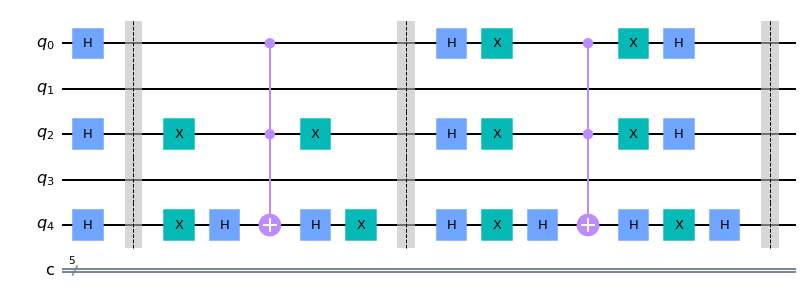

In [50]:


qc=grover.init()
oracle = grover.oracle(1)

qc= qc+oracle["100"] + grover.amp()

qc.draw(output='mpl')

In [51]:
rho = DensityMatrix(qc)
num = rho.num_qubits
datareal = np.real(rho.data)
fig = plt.figure(figsize=[5,5])
column_names = [bin(i)[2:].zfill(num) for i in range(2**num)]
row_names = [bin(i)[2:].zfill(num) for i in range(2**num)]


<Figure size 360x360 with 0 Axes>

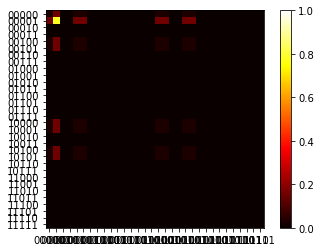

In [52]:

plt.imshow(datareal,cmap='hot')
plt.clim(0,1)
plt.xticks(range(len(row_names)),labels=row_names)
plt.yticks(range(len(column_names)),labels=column_names)
plt.colorbar()
plt.show()

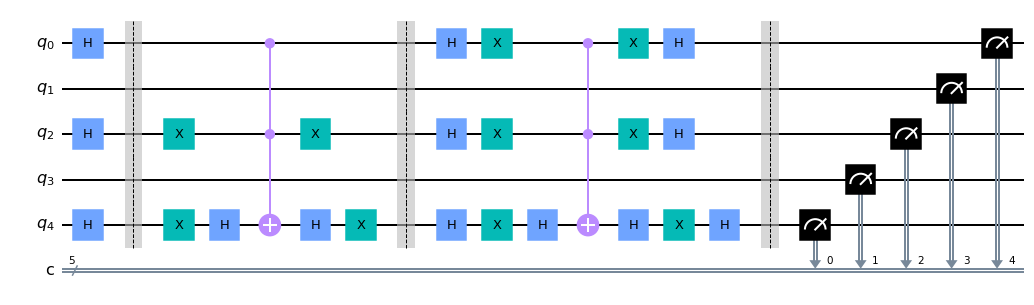

In [53]:
qc.measure(grover.qr[4],grover.cr[0])
qc.measure(grover.qr[3],grover.cr[1])
qc.measure(grover.qr[2],grover.cr[2])
qc.measure(grover.qr[1],grover.cr[3])
qc.measure(grover.qr[0],grover.cr[4])
qc.draw(output='mpl')

In [49]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')


In [ ]:
job1 = qpu_backend.run(qc,shots = 1000)

In [54]:

job2 = sim_backend.run(qc,shots = 10000)

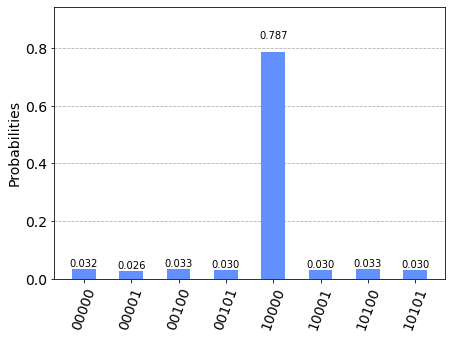

In [60]:
probs = job2.get_probabilities()
counts = job2.get_counts()
plot_histogram(counts, sort='asc', bar_labels=True)

In [66]:
print(counts)

{'00000': 316, '00001': 263, '00100': 331, '00101': 296, '10000': 7869, '10001': 298, '10100': 326, '10101': 301}
